# <h1 align="center">EDA and Model Analysis</h1>

## Data
**I retrieved this data from the following link: https://www.kaggle.com/datasets/pooriamst/best-books-ever-dataset/data. The dataset contains 25 variables and 52478 records corresponding to books on the GoodReads Best Books Ever list. This is a list of The best books ever, as voted on by the general Goodreads community.**

## Problem Definition
I'm curious to understand why readers chose the books they did as "the best books ever". I'm planning on comparing the relative position of a book in the list (bbeVotes) to its rating, total number of awards, and possibly a few other variables.

Type of Problem: Supervised Learning: Regression problem. 

## Objective:
Predict the rank of a book based on its rating and total number of awards.



In [ ]:
# Supervised Learning problem to perform EDA and model analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/mnt/d/repo/eda-model-analysis-supervised-learning/dataset/bestBooks.csv')

print(df.head())

In [ ]:
# General information about the dataset
print("Shape: ", df.shape)
df.info()
df.describe()
df.describe(include='all')
df.isnull().sum()
df.isnull().sum().sum()
df.isnull().sum().sum()/df.shape[0]

## CLEANING THE DATA

In [ ]:
df.columns = df.columns.str.strip() # Remove leading and trailing whitespace from column to ensures consistency and prevents errors when referencing column names in code
print(df.columns)

#Standardize date formats - The authors of this dataset made a note that up to record 30000, 
#the date format was mm/dd/yyyy. After record 30000, the date format was Month Day Year. Although
#this won't affect the analysis, I wanted to fix it for future use.
df['publishDate'] = pd.to_datetime(df['publishDate'], errors='coerce')
df['firstPublishDate'] = pd.to_datetime(df['firstPublishDate'], errors='coerce')

# VERY IMPORTANT > Convert awards to numeric - Since I am using awards as a feature of interest, I need to convert it to a numeric value (number of awards).
df['awards_count'] = df['awards'].apply(lambda x: len(eval(x)) if x != '[]' else 0)

# Convert pages and price to numeric
df['pages'] = pd.to_numeric(df['pages'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Feature selection
features = ['rating', 'awards_count', 'numRatings', 'likedPercent', 'bbeVotes']

# Normalize/Standardize features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Handle duplicates
df.drop_duplicates(inplace=True)

# Outlier detection and handling for 'rating' - IQR method
'''q1 = df['rating'].quantile(0.25)
q3 = df['rating'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['rating'] >= lower_bound) & (df['rating'] <= upper_bound)]'''

# Convert categorical variables to numeric using one-hot encoding
'''df = pd.get_dummies(df, columns=['language'], drop_first=True)'''

# Drop rows with NaN values in key features - I decided to drop these rows instead of using mean or median imputation, because
# the data is not missing in a way that would affect the analysis.
df.dropna(subset=['rating', 'numRatings', 'likedPercent', 'bbeVotes'], inplace=True)

# Check the cleaned data
print(df.head())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### As you see above, most of the missing values are in feature we are not using for the analysis, such as series, edition, and price.


## Data Cleaning - Conclusion and Discussion
- Summary: The data cleaning process involved standardizing formats, handling missing values, and ensuring data integrity through deduplication and (TBD)outlier removal.
- Findings: The dataset is fairly clean, with only a few missing values in some columns, which were addressed through imputation or removal.
- Challenges: Balancing data completeness with the need to remove unreliable data was a key challenge.
- Strategy: Focused on retaining as much data as possible while ensuring quality for analysis and modeling.


# MARCO > CHECK BELOW IF I SHOULD USE "FEATURES" OR KEEP ORIGINAL FEATURES. PERHAPS Outlier detection IS NOT NEEDED.

## EDA AND VISUALIZATION
### Original Data - Features' distribution

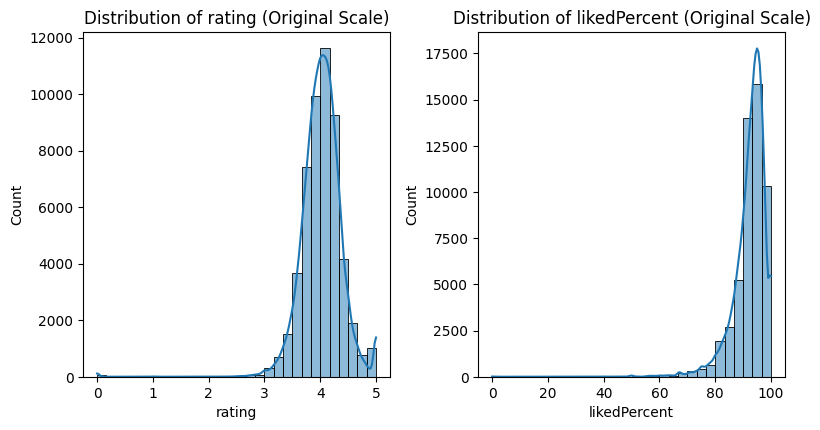

Text(0, 0.5, 'Count')

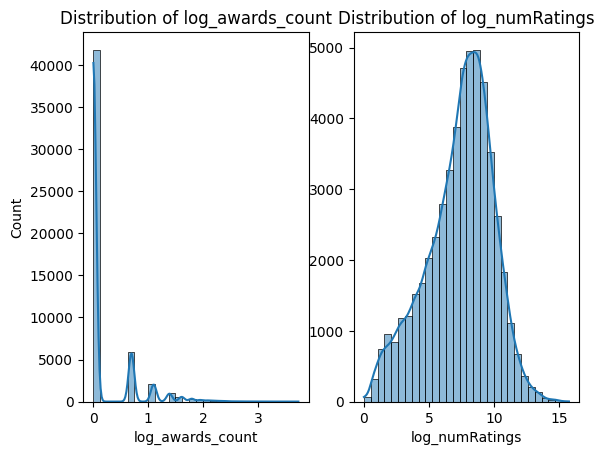

In [28]:
original_features = ['rating', 'likedPercent', 'awards_count', 'numRatings']

df_original = pd.read_csv('/mnt/d/repo/eda-model-analysis-supervised-learning/dataset/bestBooks.csv')

# Convert necessary columns to numeric
df_original['numRatings'] = pd.to_numeric(df_original['numRatings'], errors='coerce')
df_original['likedPercent'] = pd.to_numeric(df_original['likedPercent'], errors='coerce')
df_original['bbeVotes'] = pd.to_numeric(df_original['bbeVotes'], errors='coerce')
df_original['awards_count'] = df_original['awards'].apply(lambda x: len(eval(x)) if x != '[]' else 0)

# EDA: Visualize distributions with original values
plt.figure(figsize=(12, 8))
for i, feature in enumerate(original_features[0:2], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_original[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature} (Original Scale)')
plt.tight_layout()
plt.show()

# Apply log transformation to numRatings and awards_count
# Since the vast majority of books have 0 awards, the distribution is heavily skewed to the right, which is why I'm using a log transformation.
# Similar issue with numRatings, since some books have millions of ratings and some have close to 0.
df_original['log_numRatings'] = np.log1p(df_original['numRatings'])
df_original['log_awards_count'] = np.log1p(df_original['awards_count'])

# EDA: Visualize distribution of log-transformed numRatings - This transformation compresses the scale, making large values more manageable and the graph more readable.
# Log-transformed numRatings
plt.subplot(1, 2, 2)
sns.histplot(df_original['log_numRatings'], kde=True, bins=30)
plt.title('Distribution of log_numRatings')
plt.xlabel('log_numRatings')
plt.ylabel('Count')

# Log-transformed awards_count
plt.subplot(1, 2, 1)
sns.histplot(df_original['log_awards_count'], kde=True, bins=30)
plt.title('Distribution of log_awards_count')
plt.xlabel('log_awards_count')
plt.ylabel('Count')


### Comparing different features to bbeVotes

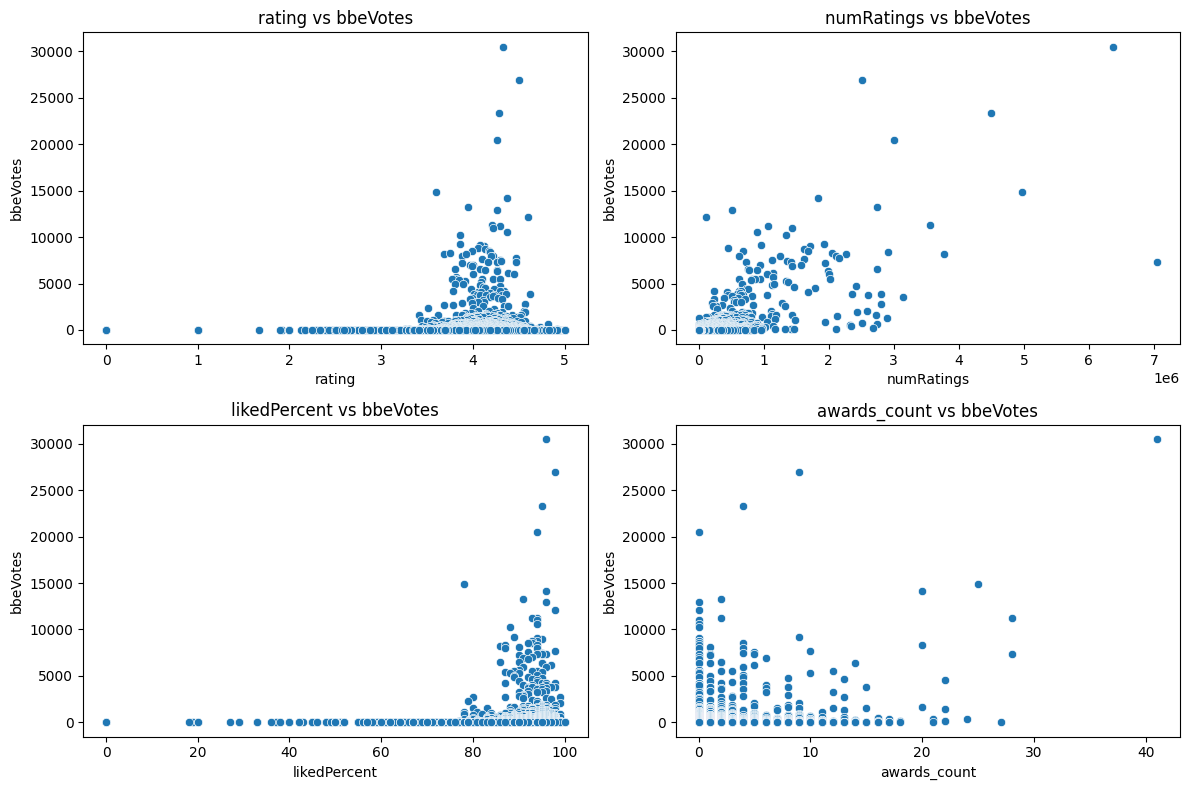

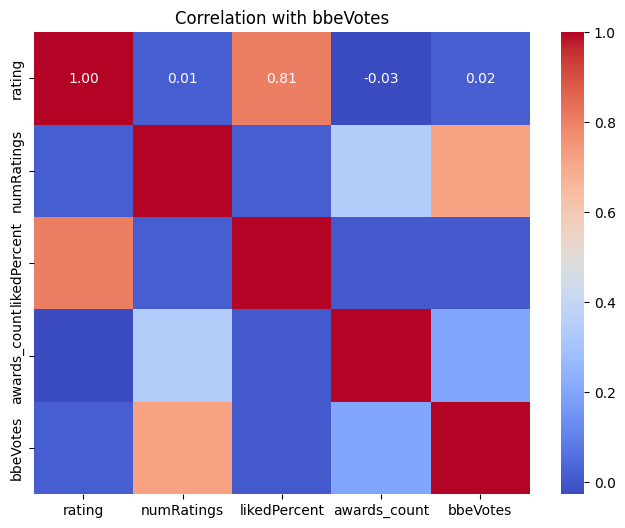

In [29]:
# Features to compare with bbeVotes
comparison_features = ['rating', 'numRatings', 'likedPercent', 'awards_count']

# Visualize relationships with bbeVotes
plt.figure(figsize=(12, 8))
for i, feature in enumerate(comparison_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df_original[feature], y=df_original['bbeVotes'])
    plt.title(f'{feature} vs bbeVotes')
    plt.xlabel(feature)
    plt.ylabel('bbeVotes')
plt.tight_layout()
plt.show()

# Correlation analysis
corr_matrix_bbeVotes = df_original[comparison_features + ['bbeVotes']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_bbeVotes, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with bbeVotes')
plt.show()

## TO BE DONE: EDA analysis and conclusions AND correlation matrix with analysis

## Machine Learning Model - Linear Regression

Reasons to start with a linear regression model:
- I will start with a simple linear regression model to provide a baseline. I can use this model to compare the performance of other models.
- Linear models are computationally less intensive compared to non-linear models, making them suitable for large datasets such as this one.
- Linear models are easier to interpret and understand, making it easier to understand the relationship between the features and the target variable.


Problem: Predict the rank of a book based on its rating and total number of awards.
To achieve this, I'll use a linear regression model. The data will be split into training and testing sets, and the model will be trained on the training set and evaluated on the testing set.

To evaluate the model, I'll use the mean squared error (MSE)? and R-squared (R2) metrics?.

In [31]:
# Drop rows with NaN values in key features
df_original.dropna(subset=['rating', 'numRatings', 'likedPercent', 'awards_count', 'bbeVotes'], inplace=True)

# Define features and target
X = df_original[['rating', 'numRatings', 'likedPercent', 'awards_count']]
y = df_original['bbeVotes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Updated evaluation code
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# predictions
y_pred = model.predict(X_test)

# Ensure y_test and y_pred are numeric arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# R²
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')

# results interpretation
coefficients = model.coef_
feature_importance = pd.DataFrame(coefficients, X.columns, columns=['Coefficient'])
print(feature_importance)

RMSE: 212.35510083053367
R²: 0.5137581876443038
              Coefficient
rating          23.588887
numRatings       0.002727
likedPercent    -1.281250
awards_count   -17.451384


## Machine Learning Model - Random Forest Regressor

I will construct multiple decision trees during training and outputs the mean prediction of the individual trees, which will hopefully help me understand the relationship between the features and the target variable.

Reasons to use a Random Forest Regressor:

- Handles Non-Linearity: Can capture complex relationships between features and the target variable.
- Robust to Overfitting: Generally more robust to overfitting than individual decision trees, especially with a large number of trees.
- Feature Importance: Provides insights into feature importance, which can be useful for understanding the model.


## TO BE DONE 
Model section
above and beyond
expectations.
E.g. proper single
model and at least
three of the
following:
● addresses
multilinear
regression/collin
earity
● feature
engineering
● multiple ML
models
● hyperparameter
tuning
● regularization or
other training
techniques such
as cross
validation,
oversampling/un
dersampling/SM
OTE or similar
for managing
data imbalance
● uses models not
covered in class

# DISCUSSION AND CONCLUSIONS
## LINEAR REGRESSION
- RMSE (Root Mean Squared Error)
Value: 212.3551
Interpretation: RMSE is a measure of the average magnitude of the errors between the predicted and actual values. In this context, an RMSE of 212.36 suggests that, on average, the model's predictions are off by about 212.36 units of the target variable (bbeVotes). Whether this is a good or bad result depends on the scale of bbeVotes. If bbeVotes values range widely, this might be acceptable; if not, it indicates significant prediction errors.
- R² (R-squared)
Value: 0.5138
Interpretation: R² represents the proportion of variance in the target variable that is explained by the model. An R² of 0.514 means that approximately 51.4% of the variability in bbeVotes is explained by the features in the model. This indicates a moderate fit, suggesting that while the model captures some of the relationships between the features and the target, there is still a substantial amount of unexplained variance.
### Coefficients
- rating: 23.5889
Interpretation: For each unit increase in rating, the model predicts an increase of approximately 23.59 in bbeVotes, assuming all other features remain constant. This positive coefficient suggests that higher-rated books tend to have higher bbeVotes.
- numRatings: 0.0027
Interpretation: For each additional rating, the model predicts an increase of approximately 0.0027 in bbeVotes. This small coefficient indicates that while numRatings has a positive relationship with bbeVotes, its impact is minimal.
- likedPercent: -1.2813
Interpretation: For each percentage point increase in likedPercent, the model predicts a decrease of approximately 1.28 in bbeVotes. This negative coefficient might seem counterintuitive, suggesting that higher likedPercent is associated with lower bbeVotes. This could indicate multicollinearity or that likedPercent is capturing some other underlying effect.
- awards_count: -17.4514
Interpretation: For each additional award, the model predicts a decrease of approximately 17.45 in bbeVotes. This negative relationship might suggest that books with more awards are not necessarily ranked higher in bbeVotes, or it could be due to multicollinearity or other confounding factors.
